In [14]:
import numpy as np

In [89]:
true_vals = np.random.rand(100)
true_vals.sort()
print(true_vals)
N = len(true_vals)
n_data = 75 # how many to pick in each dataset
data_1 = []
data_1_idx = np.random.permutation(range(N))[:n_data]
data_2_idx = np.random.permutation(range(N))[:n_data]
data_1_idx.sort()
data_2_idx.sort()

print(len(set(data_1_idx).intersection(set(data_2_idx))))

[8.47249908e-04 5.30551792e-03 2.80284392e-02 5.12043079e-02
 5.31242632e-02 7.88750216e-02 8.15920878e-02 8.33852748e-02
 9.35064014e-02 9.98857033e-02 1.02879934e-01 1.30003875e-01
 1.30852002e-01 1.32083611e-01 1.46407889e-01 1.48638628e-01
 1.50855892e-01 1.55488560e-01 1.55861553e-01 1.56524910e-01
 1.58423443e-01 1.65753409e-01 1.75109560e-01 1.78512642e-01
 1.81097176e-01 1.97199999e-01 2.09645250e-01 2.16547626e-01
 2.18405626e-01 2.22205586e-01 2.38187675e-01 2.64126322e-01
 2.66381459e-01 2.83395079e-01 2.86568929e-01 2.91740648e-01
 3.00296805e-01 3.07212608e-01 3.08316260e-01 3.10733532e-01
 3.11491590e-01 3.32953477e-01 3.48641172e-01 3.66774246e-01
 3.75267923e-01 3.81288746e-01 3.81588092e-01 3.85113185e-01
 3.93026513e-01 3.98540022e-01 4.04867545e-01 4.05473687e-01
 4.17842488e-01 4.19526378e-01 4.28182929e-01 4.37575404e-01
 4.52202872e-01 4.53236350e-01 4.66552617e-01 5.14336760e-01
 5.17370178e-01 5.23373188e-01 5.24398766e-01 5.42328568e-01
 5.46742257e-01 5.706109

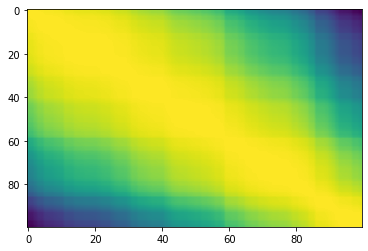

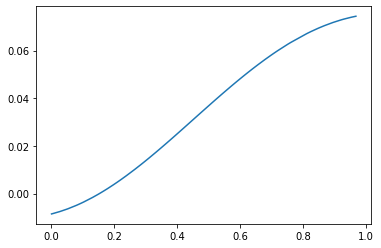

In [90]:
# sample an offset function
alpha = 0.01
gam = 1.
K = np.zeros((N,N),np.double)
for n in range(N):
    for m in range(N):
        K[n,m] = alpha*np.exp(-(1./gam)*(true_vals[n]-true_vals[m])**2)
        
import pylab as plt
%matplotlib inline
plt.imshow(K,aspect='auto')
true_offset_function = np.random.multivariate_normal(np.zeros(N),K)
plt.figure()
plt.plot(true_vals,true_offset_function)

In [91]:
observed_1 = true_vals[data_1_idx]
observed_2 = true_vals[data_2_idx] + true_offset_function[data_2_idx]
sub_k = K[data_1_idx,:]
sub_k = sub_k[:,data_1_idx]


In [92]:
mean_offset_function = np.zeros(n_data)
corrected_data_2 = observed_2 - mean_offset_function

11 57


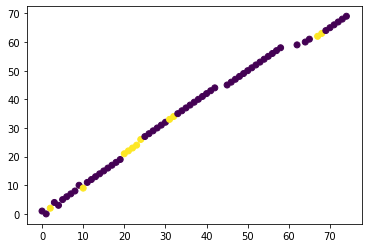

In [93]:
import copy
def match(d1,d2,max_err=0.1):
    matches = []
    d2_copy = list(copy.deepcopy(d2))
    for i,d in enumerate(d1):
        di = np.abs([dd - d for dd in d2_copy])
        pos = np.argmin(di)
        if di[pos] <= max_err:
            matches.append([i,pos])
            d2_copy[pos] = 1e6
    return np.array(matches)

def eval_matches(matches,data_1_idx,data_2_idx):
    correct = 0
    incorrect = 0
    status = []
    for pos1,pos2 in matches:
        if data_1_idx[pos1] == data_2_idx[pos2]:
            correct += 1
            status.append(1)
        else:
            incorrect += 1
            status.append(-1)
    return correct,incorrect,status

matches = match(observed_1,corrected_data_2)
cor,incor,status = eval_matches(matches,data_1_idx,data_2_idx)
plt.scatter(matches[:,0],matches[:,1],c=status)
print(cor,incor)

(68, 2)


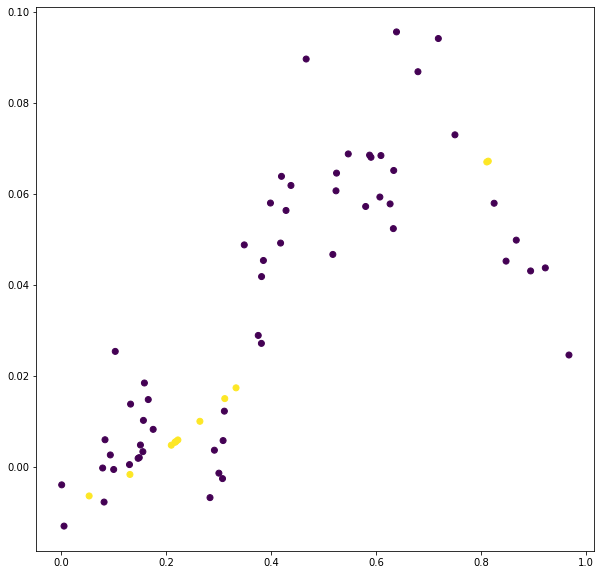

In [100]:
d1 = observed_1[matches[:,0]]
d2 = observed_2[matches[:,1]]
plt.figure(figsize=(10,10))
plt.scatter(d1,d2-d1,c=status)
print(matches.shape)

In [104]:
a = np.zeros(N)
print(a.shape)
print(a)

(100,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [102]:
a = a[:,None]
print(a.shape)

(100, 1)


In [103]:
print(a)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
